# Exploring the Data Sets of the Nairobi Ambulance Challenge

The following data sets will be looked into further:
* Train.csv - Contains all accidents with time and location over 18 months (01/2018 - 07/2019)
* Weather_Nairobi_daily_GFS.csv - Daily (one row) information for 6 weather features in Nairobi over 24 months (01/2018 - 01/2020)
* Segment_info.csv - Column meanings unknown, value tbd

Check out documentation at https://github.com/caiomiyashiro/geospatial_data_analysis/blob/master/AMLD-2020/Presentation_AMLD_2020.ipynb

## Importing packages

In [1]:
import pandas as pd
import math
import seaborn as sns

## Accident location over time

In [2]:
df = pd.read_csv('Inputs/Train.csv', parse_dates=['datetime'])
print(df.shape)
df.head()

(6318, 4)


,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382


Creating time windows as demand "containers" helps to interpret demand over time

In [3]:
df["time_window"] = df["datetime"].apply(lambda x: math.floor(x.hour / 3) + 1)

In [4]:
dict_windows = {1: "00-03", 2: "03-06", 3: "06-09", 4: "09-12", 5: "12-15", 6: "15-18", 7: "18-21", 8: "21-24"}

In [5]:
df["time_window_str"] = df["time_window"].apply(lambda x: dict_windows.get(x))

In [6]:
dict_months = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
               7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

In [7]:
df["day"] = df["datetime"].apply(lambda x: x.day)

In [8]:
df["month"] = df["datetime"].apply(lambda x: dict_months.get(x.month))

In [9]:
df["year"] = df["datetime"].apply(lambda x: x.year)

In [10]:
df["weekday"] = df["datetime"].apply(lambda x: x.weekday())

In [11]:
df.tail()

,uid,datetime,latitude,longitude,time_window,time_window_str,day,month,year,weekday
6313,6314,2019-06-29 18:52:44,-1.262271,36.726540,7,18-21,29,Jun,2019,5
6314,6315,2019-06-30 09:57:44,-1.279468,36.790449,4,09-12,30,Jun,2019,6
6315,6316,2019-06-30 12:02:14,-1.322109,36.825248,5,12-15,30,Jun,2019,6
6316,6317,2019-06-30 16:59:14,-1.278589,36.816518,6,15-18,30,Jun,2019,6
6317,6318,2019-06-30 20:06:14,-1.211500,36.907635,7,18-21,30,Jun,2019,6


In [12]:
df.groupby("time_window_str").datetime.count()

time_window_str
00-03     296
03-06     340
06-09    1724
09-12     976
12-15     834
15-18     853
18-21     888
21-24     407
Name: datetime, dtype: int64

### Overall accidents per time window for 2018 and 2019

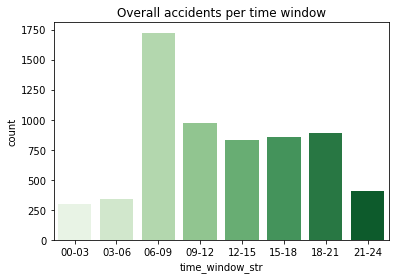

In [13]:
fig01 = sns.countplot(data=df, x="time_window_str", palette="Greens")
fig01.set_title("Overall accidents per time window");

### Mean and median accidents per time window for 2018 and 2019

In [14]:
max_acc = pd.crosstab(df["time_window_str"], df["day"]).max(axis=1)
min_acc = pd.crosstab(df["time_window_str"], df["day"]).min(axis=1)
mean_acc = pd.crosstab(df["time_window_str"], df["day"]).mean(axis=1)
median_acc = pd.crosstab(df["time_window_str"], df["day"]).median(axis=1)

In [15]:
df_stats = pd.DataFrame([max_acc, min_acc, mean_acc, median_acc]).T
df_stats.columns = ["max", "min", "mean", "median"]
df_stats.reset_index(inplace=True)
df_stats.head()

,time_window_str,max,min,mean,median
0,00-03,24.0,1.0,9.548387,8.0
1,03-06,36.0,1.0,10.967742,9.0
2,06-09,86.0,12.0,55.612903,58.0
3,09-12,57.0,12.0,31.483871,29.0
4,12-15,48.0,10.0,26.903226,27.0


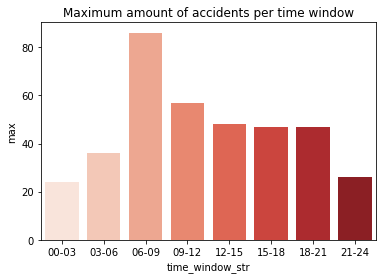

In [16]:
fig = sns.barplot(data=df_stats, x="time_window_str", y="max", palette="Reds")
fig.set_title("Maximum amount of accidents per time window");

Note: Minimum cannot be 0 because then we also do not have a column ... need to fix that somehow

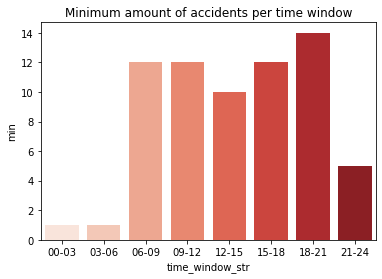

In [17]:
fig = sns.barplot(data=df_stats, x="time_window_str", y="min", palette="Reds")
fig.set_title("Minimum amount of accidents per time window");

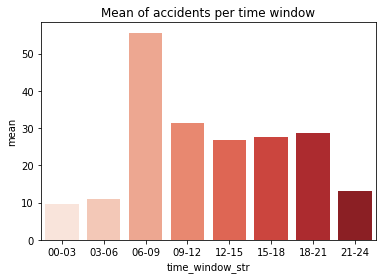

In [18]:
fig = sns.barplot(data=df_stats, x="time_window_str", y="mean", palette="Reds")
fig.set_title("Mean of accidents per time window");

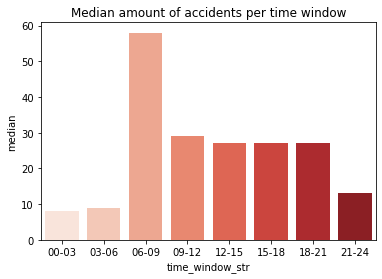

In [19]:
fig = sns.barplot(data=df_stats, x="time_window_str", y="median", palette="Reds")
fig.set_title("Median amount of accidents per time window");

### Overall accidents per month for 2018

Note: Avoid counting both first halfs (2018 & 2019)

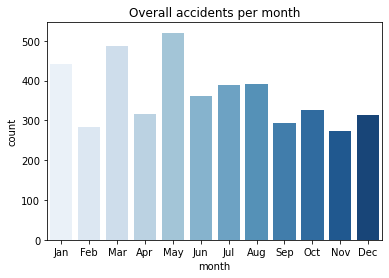

In [20]:
fig02 = sns.countplot(data=df[df.year == 2018], x="month", palette="Blues")
fig02.set_title("Overall accidents per month");

## Accidents per weekday

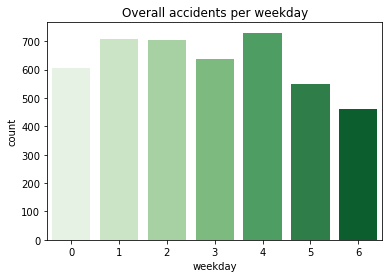

In [21]:
fig03 = sns.countplot(data=df[df.year == 2018], x="weekday", palette="Greens")
fig03.set_title("Overall accidents per weekday");

### Time window per day

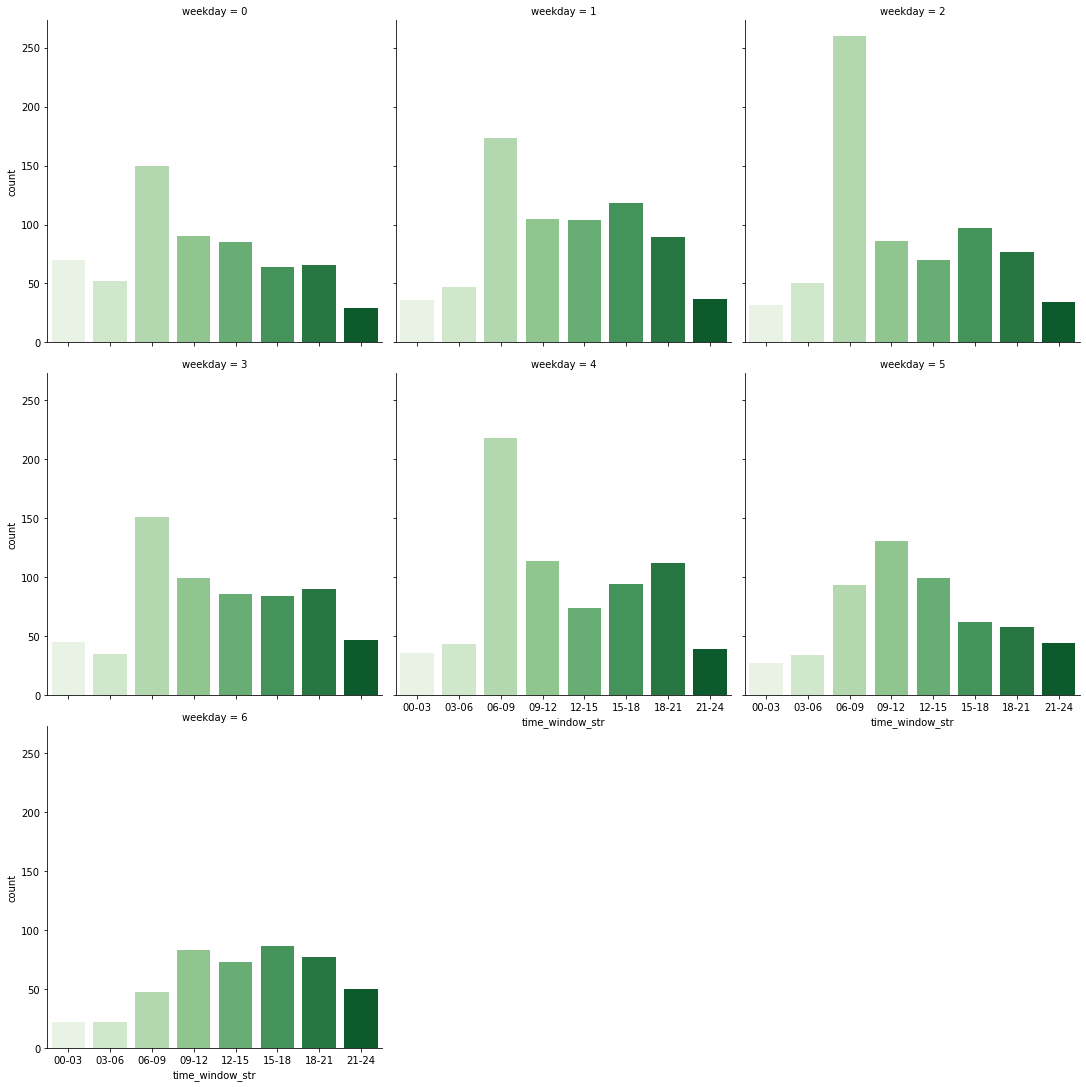

In [22]:
sns.catplot(x="time_window_str", col="weekday",data=df[df.year == 2018], kind="count", col_wrap=3, palette="Greens");

### Overall accidents per month and time window for 2018

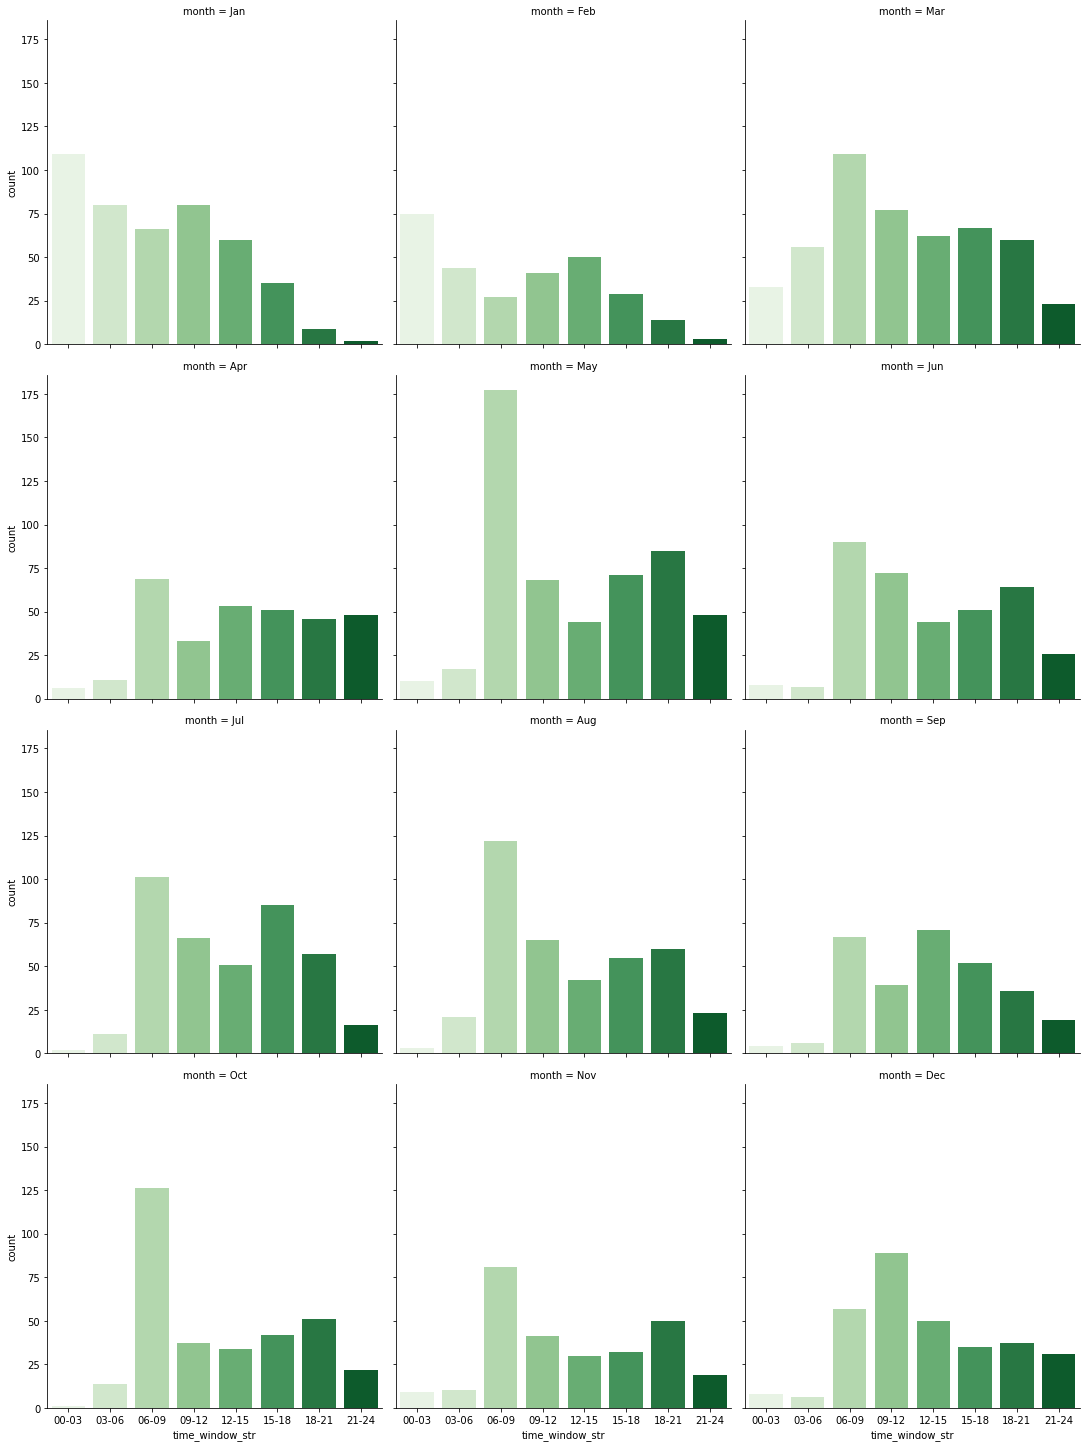

In [23]:
sns.catplot(x="time_window_str", col="month",data=df[df.year == 2018], kind="count", col_wrap=3, palette="Greens");

### Overall accidents per month and day for 2018

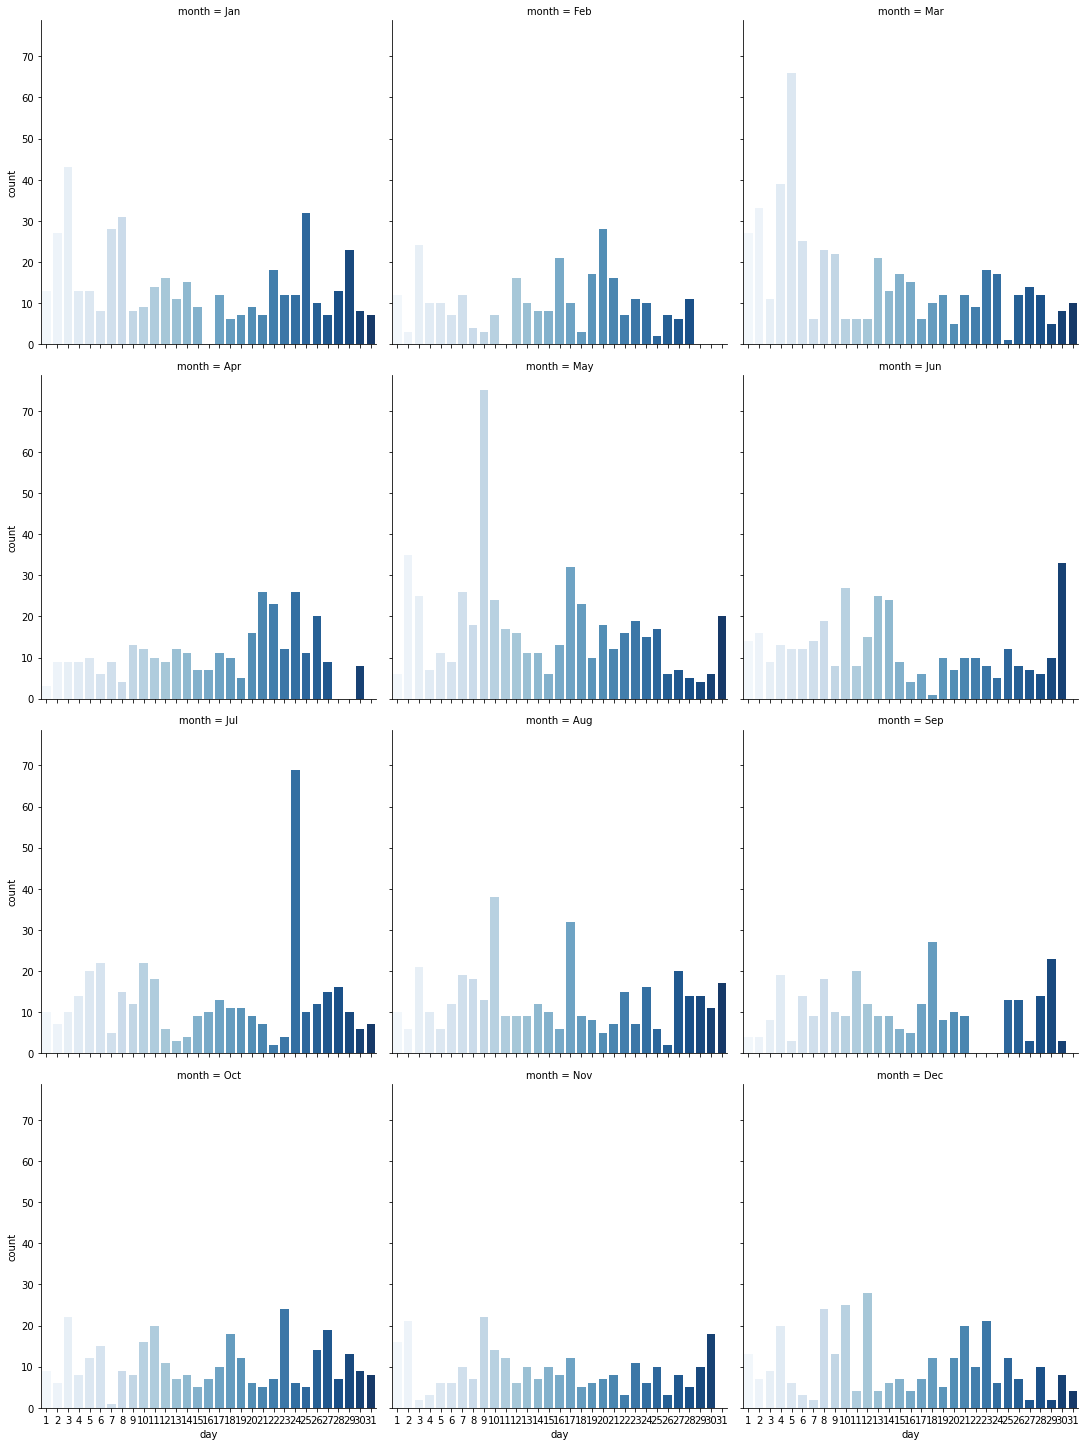

In [24]:
sns.catplot(x="day", col="month",data=df[df.year == 2018], kind="count", col_wrap=3, palette="Blues");

Note: **It seems that we have missing data for some days.**

In [25]:
df_check = df[(df.month == "Sep") & (df.day > 20) & (df.day < 26)]
df_check

,uid,datetime,latitude,longitude,time_window,time_window_str,day,month,year,weekday
3406,3407,2018-09-21 06:02:39,-1.213003,36.903414,3,06-09,21,Sep,2018,4
3407,3408,2018-09-21 06:09:09,-1.218637,36.891361,3,06-09,21,Sep,2018,4
3408,3409,2018-09-21 06:47:09,-1.289358,36.810835,3,06-09,21,Sep,2018,4
3409,3410,2018-09-21 09:40:39,-1.329686,36.870994,4,09-12,21,Sep,2018,4
3410,3411,2018-09-21 18:14:39,-1.258831,36.915564,7,18-21,21,Sep,2018,4
3411,3412,2018-09-21 18:22:39,-1.299459,36.824866,7,18-21,21,Sep,2018,4
3412,3413,2018-09-21 19:04:39,-1.316585,36.833825,7,18-21,21,Sep,2018,4
3413,3414,2018-09-21 19:13:09,-1.316142,36.813828,7,18-21,21,Sep,2018,4
3414,3415,2018-09-21 21:26:09,-1.330251,36.866555,8,21-24,21,Sep,2018,4
3415,3416,2018-09-25 12:46:39,-1.205573,36.917440,5,12-15,25,Sep,2018,1


In [26]:
df_check.shape

(22, 10)

We will have to create these non-existent rows and fill them with something ...

### To Do
* Create rows for non-existent time windows (merge with a template dataframe of time windows?)
* Fill these rows with some data to get better statistics